In [84]:
import sys
sys.path.append("../sortingAlgorithms")

import pickle
import random
from time import sleep
from typing import List

from time_test import timer
from insertion_sort import insertion_sort
from merge_sort import merge, merge_sort

from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

In [85]:
def create_random_array(N:int, val_from:int = 100, val_to:int = 10_000) -> List:
    return [random.randint(val_from, val_to) for _ in range(N)]

In [86]:
@timer
def insertion_sort_time(the_list: List, list_length: int):
    insertion_sort(the_list, list_length)

In [87]:
@timer
def merge_sort_time(the_list: List, p: int, r: int):
    merge_sort(the_list, p, r)

In [88]:
# Calculate real time of insertion sort on data

# Xn = [i for i in range(1, 10_001)]
# yn = []
# for one_list in tqdm([create_random_array(num_items) for num_items in Xn]):
#     yn.append(insertion_sort_time(one_list, len(one_list)))

In [89]:
# Save insertion sort time

# with open(r"..\sortingAlgorithms\artifacts\insertion_sort_time.pkl", "wb") as insertion_sort_stat_file:
#     pickle.dump({"Xn": Xn, "yn": yn}, insertion_sort_stat_file)

In [90]:
# Calculate real time of merge sort on data

# Xn = [i for i in range(1, 10_001)]
# yn = []
# for one_list in tqdm([create_random_array(num_items) for num_items in Xn]):
#     yn.append(merge_sort_time(one_list, p = 0, r = len(one_list)-1))

In [91]:
# Save merge sort time

# with open(r"..\sortingAlgorithms\artifacts\merge_sort_time.pkl", "wb") as merge_sort_stat_file:
#     pickle.dump({"Xn": Xn, "yn": yn}, merge_sort_stat_file)

In [92]:
with open(r"..\sortingAlgorithms\artifacts\insertion_sort_time.pkl", "rb") as insertion_sort_stat_file:
    insertion_sort_stat_dict = pickle.load(insertion_sort_stat_file)

In [93]:
with open(r"..\sortingAlgorithms\artifacts\merge_sort_time.pkl", "rb") as merge_sort_stat_file:
    merge_sort_stat_dict = pickle.load(merge_sort_stat_file)

In [94]:
Xn_insertion_sort, yn_insertion_sort = insertion_sort_stat_dict["Xn"], insertion_sort_stat_dict["yn"]
Xn_mrege_sort, yn_merge_sort = merge_sort_stat_dict["Xn"], merge_sort_stat_dict["yn"] 

Text(0, 0.5, 'Execution time')

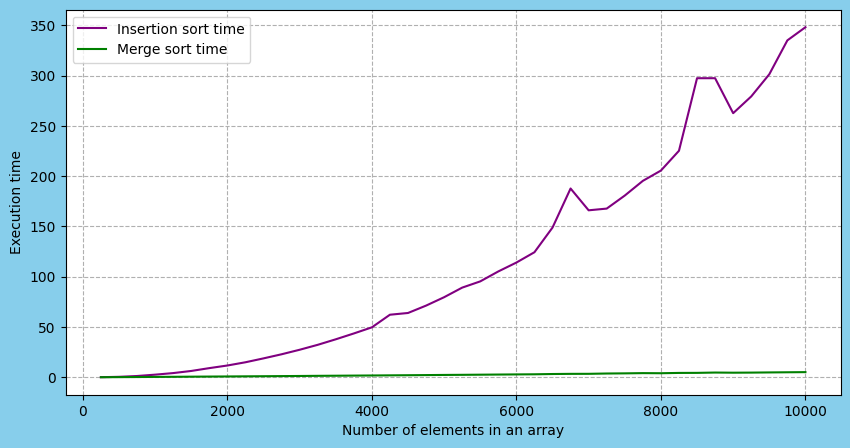

In [95]:
some_figure = plt.figure(figsize=(10, 5), facecolor='skyblue')
some_ax = some_figure.add_subplot()
some_ax.grid(linestyle = '--')

# Plot insertion sort times averaged by 250

# some_ax.plot(Xn_insertion_sort, yn_insertion_sort, color='purple', label="Insertion sort time")
yn_insertion_sort_averaged_time = np.array(yn_insertion_sort).reshape(len(yn_insertion_sort)//250, 250)@np.ones((250, 1)).reshape(-1)
some_ax.plot([250*i for i in range(1, len(yn_insertion_sort)//250 + 1)], yn_insertion_sort_averaged_time, color='purple', label="Insertion sort time")
# Plot merge sort times averaged by 250
yn_merge_sort_averaged_time = np.array(yn_merge_sort).reshape(len(yn_merge_sort)//250, 250)@np.ones((250, 1)).reshape(-1)
some_ax.plot([250*i for i in range(1, len(yn_merge_sort)//250 + 1)], yn_merge_sort_averaged_time, color='green', label="Merge sort time")

some_ax.legend()
some_ax.set_xlabel("Number of elements in an array")
some_ax.set_ylabel("Execution time")